In [20]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Load data set
iris = sns.load_dataset('iris')

In [22]:
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [23]:
# Explore the dataset's structure
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


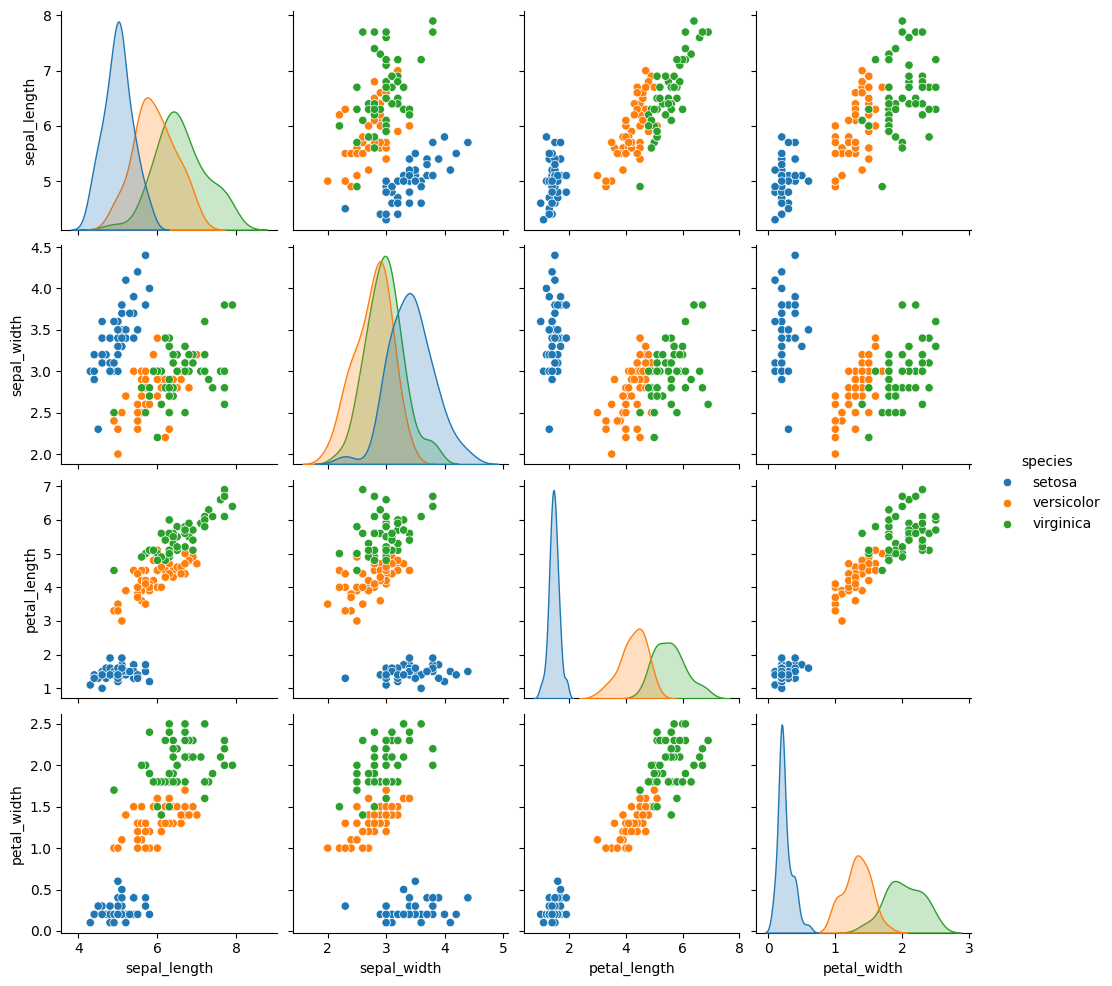

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='species')
plt.show()

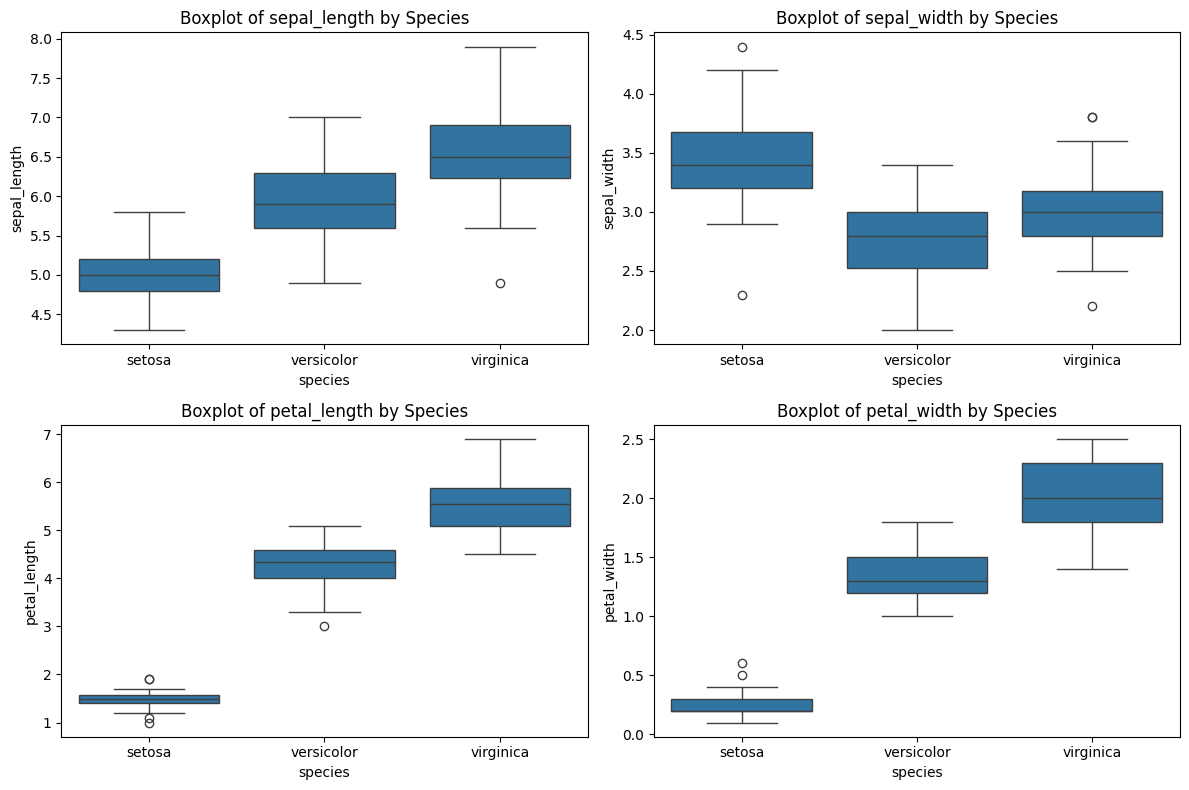

In [10]:
## Boxplots to visualize the distribution of each feature across species
plt.figure(figsize=(12, 8))
for idx, feature in enumerate(iris.columns[:-1]):  # Excluding 'species'
    plt.subplot(2, 2, idx+1)
    sns.boxplot(x='species', y=feature, data=iris)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

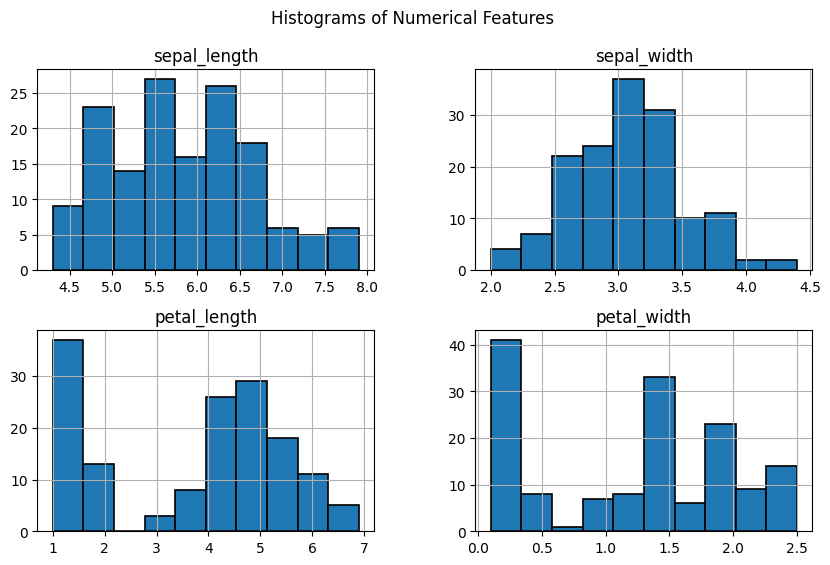

In [11]:
## Histograms for the numerical variables
iris.hist(edgecolor='black', linewidth=1.2, figsize=(10, 6))
plt.suptitle("Histograms of Numerical Features")
plt.show()

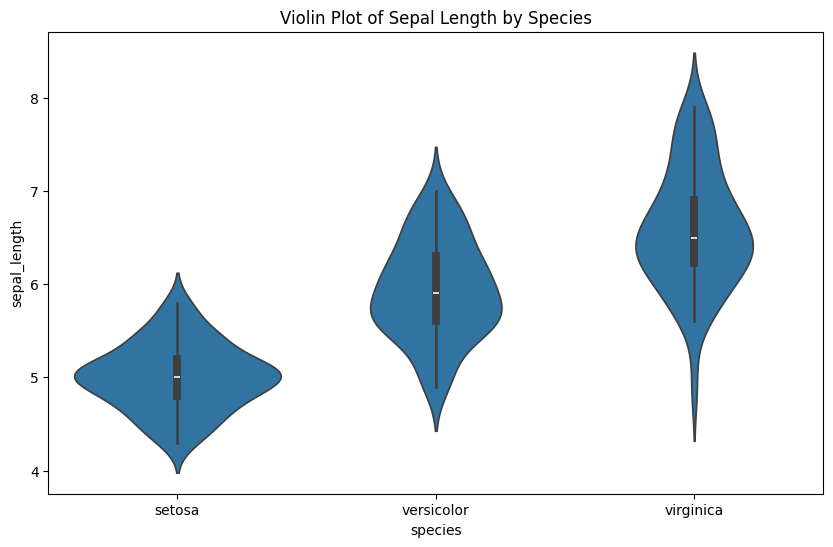

In [12]:
# Additional plot: Violin plot for feature distribution by species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.title("Violin Plot of Sepal Length by Species")
plt.show()

In [13]:
#Statistical summary and insights
# Calculate basic statistical metrics for each feature
statistical_summary = iris.describe()

# Extracting mean, median, and standard deviation for numeric columns only
mean_values = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
median_values = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].median()
std_dev_values = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].std()

# Display results
print("Statistical Summary:\n", statistical_summary)
print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation Values:\n", std_dev_values)

Statistical Summary:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Mean Values:
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Median Values:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

Standard Deviation Values:
 sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


In [14]:
# Simple classification model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [15]:
# Split the dataset into training and test sets (70% training, 30% testing)
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = iris['species']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Implement a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors
knn.fit(X_train, y_train)  # Train the model

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [18]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 1.00


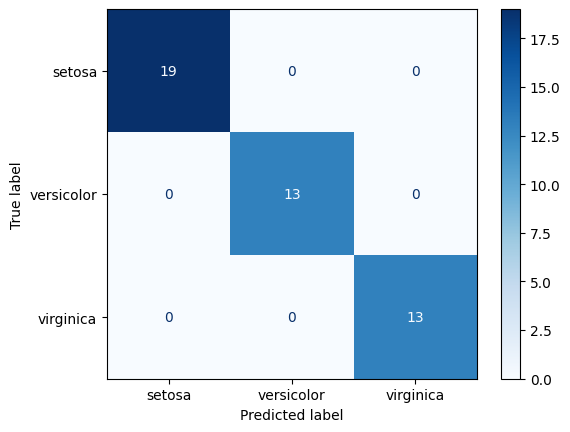

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into training and test sets (70% training, 30% testing)
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = iris['species']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors
knn.fit(X_train, y_train)  # Train the model

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix using y_test and y_pred
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
confusion_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
confusion_display.plot(cmap='Blues', values_format='d')

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")
